# NLPipe - Demo (simple)
<p>#TODO: Needs description of what this file is</p>

# Initialize environment

In [1]:
import sys
import os

PROJECT_DIR = f'{os.getcwd()}'
DEMO_DATA_DIR = f'{os.getcwd()}/data'
DEMO_DATA_FILE = f'{DEMO_DATA_DIR}/IMDB Dataset.csv.gz'
UTILITIES_DIR = f'{PROJECT_DIR}/utilities'

# Add the UTILITY_DIR to the path to import files
sys.path.append(UTILITIES_DIR)

In [2]:
import pandas as pd
import numpy as np

# Load Data
<p>Loading the IMDB Dataset<br>
50,000 records on pos/neg sentiment analysis<br>
25,000 records per class<br>

In [3]:
# Loading the IMDB Dataset
ORIG_DF = pd.read_csv(DEMO_DATA_FILE, compression='gzip')

# Changing target column from string to 0,1. Label encoding not yet included in framework
ORIG_DF['sentiment'] = np.where(ORIG_DF['sentiment']=='positive', 1, 0)

print(f'Data shape: {ORIG_DF.shape}')
display(ORIG_DF.head())

Data shape: (50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [4]:
# Setting up variables for later usage in DataPackage
DATA_COLUMN = 'review'
TARGET_COLUMN = 'sentiment'
UNIQUE_COLUMN = None   # Unique index column. If None, one will be created

# DataPackageParams
<p>#TODO: Needs description of what DataPackageParams is</p>

In [5]:
# DataPackageParams are optional. Can do it manually or store and save the params for re-run
from DataPackage import DataPackageParams
myDPP = DataPackageParams(
                    process_params=False, # True=run all data cleanup/setup on load
                    
                    # Class Balance
                    sample_size = None, # Can be set to an absolute value. None means undersample to smallest
                                        
                    # Text Cleaning Params
                    fix_unicode=True,  # fix various unicode errors
                    to_ascii=True,  # transliterate to closest ASCII representation
                    lower=True,  # lowercase text
                    no_line_breaks=False,  # fully strip line breaks as opposed to only normalizing them
                    no_urls=False,  # replace all URLs with a special token
                    no_emails=False,  # replace all email addresses with a special token
                    no_phone_numbers=False,  # replace all phone numbers with a special token
                    no_numbers=True,  # replace all numbers with a special token
                    no_digits=False,  # replace all digits with a special token
                    no_currency_symbols=False,  # replace all currency symbols with a special token
                    no_punct=False,  # remove punctuations
                    replace_with_punct="",  # instead of removing punctuations you may replace them
                    replace_with_url="<URL>",
                    replace_with_email="<EMAIL>",
                    replace_with_phone_number="<PHONE>",
                    replace_with_number="",
                    replace_with_digit="0",
                    replace_with_currency_symbol="<CUR>",
                    lang="en",  # set to 'de' for German special handling

                    # Remove stopwords
                    remove_stopwords=True, # Removes stopwords
                    stopword_language='english',
        
                    # train test split params
                    stratifyColumn=None, # If None will be autoset to target_column in DataPackage
                    train_size=0.8, # Can be percent or absolute number
                    random_state=765,
                    shuffle=True,

                    # Encoding params
                    encoding_type='TFIDF', # Currently only supports TFIDF encoding, TBA: BERT, GLOVE, Word2Vec
                    max_features=100 # Currently only used in TFIDF
                    )

# Data Package
<p>#TODO: Needs description of what this file is</p>

In [6]:
# Create the DataPackage
from DataPackage import DataPackage
myDP = DataPackage(original_data = ORIG_DF,
                   data_column = DATA_COLUMN,
                   target_column = TARGET_COLUMN,
                   unique_column = UNIQUE_COLUMN,
                   data_package_params = myDPP)

# Experiment Manager

In [7]:
from ExperimentManager import ExperimentManager

In [8]:
# Create the classifier used for the first Experiment
from xgboost import XGBClassifier
classifier1 = XGBClassifier(eval_metric='mlogloss', 
                            tree_method='gpu_hist',
                            gpu_id = 0,
                            predictor='gpu_predictor',
                            use_label_encoder=False,
                            max_depth=10,
                            n_estimators=100)

In [9]:
# Create the Experiment Manager 
myEM = ExperimentManager(project_name='NLPipe',
                         experiment_name='XGB depth:10 est:100',
                         classifier=classifier1,
                         data_package=myDP)

                         

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Original Data:
---> original data shape: (50000, 3)
Working Data:
---> working data shape: (50000, 3)
Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False
Data:
---> isOrigDataLoaded: True
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

DataExperiment summary:
---> projectName: NLPipe
---> experimentName: XGB depth:10 est:100
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=0, importance_type=None, interaction_constra

In [10]:
# Add another experiment
from sklearn.ensemble import RandomForestClassifier

classifier2 = XGBClassifier(eval_metric='mlogloss', 
                           tree_method='gpu_hist',
                           use_label_encoder=False,
                           max_depth=10,
                           n_estimators=50)

myEM.add_experiment(experiment_name='XGB depth:10 est:50',
                    classifier=classifier2)

DataExperiment summary:
---> projectName: NLPipe
---> experimentName: XGB depth:10 est:50
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=

In [11]:
# Add another experiment
classifier3 = XGBClassifier(eval_metric='mlogloss', 
                           tree_method='gpu_hist',
                           use_label_encoder=False,
                           max_depth=3,
                           n_estimators=100)

myEM.add_experiment(experiment_name='XGB depth:3 est:100',
                    classifier=classifier3)

DataExperiment summary:
---> projectName: NLPipe
---> experimentName: XGB depth:3 est:100
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=

In [12]:
# Add another experiment
classifier4 = XGBClassifier(eval_metric='mlogloss', 
                           tree_method='gpu_hist',
                           use_label_encoder=False,
                           max_depth=3,
                           n_estimators=50)

myEM.add_experiment(experiment_name='XGB depth:3 est:50',
                    classifier=classifier4)

DataExperiment summary:
---> projectName: NLPipe
---> experimentName: XGB depth:3 est:50
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=No

In [13]:
# Add another experiment
classifier5 = XGBClassifier(eval_metric='mlogloss', 
                           tree_method='gpu_hist',
                           use_label_encoder=False,
                           max_depth=3,
                           n_estimators=20)

myEM.add_experiment(experiment_name='XGB depth:3 est:20',
                    classifier=classifier5)

DataExperiment summary:
---> projectName: NLPipe
---> experimentName: XGB depth:3 est:20
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=No

# ExperimentManager - run_experiment

In [14]:
myEM.list_experiments()

idx Processed Experiment name
  0     False XGB depth:10 est:100
  1     False XGB depth:10 est:50
  2     False XGB depth:3 est:100
  3     False XGB depth:3 est:50
  4     False XGB depth:3 est:20


Data package has not been processed. Processing now.
-------------------------------------------------------
DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Original Data:
---> original data shape: (50000, 3)
Working Data:
---> working data shape: (50000, 3)
Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False
Data:
---> isOrigDataLoaded: True
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

Processing data package with provided parameters


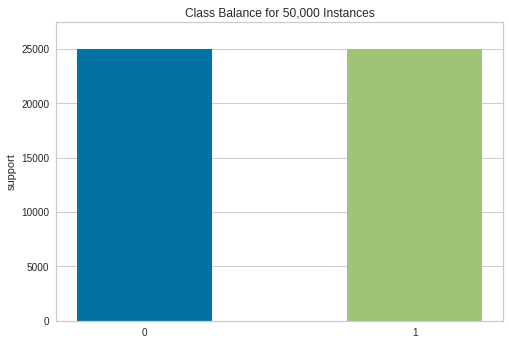

Undersampling data to match min class: 0 of size: 25000


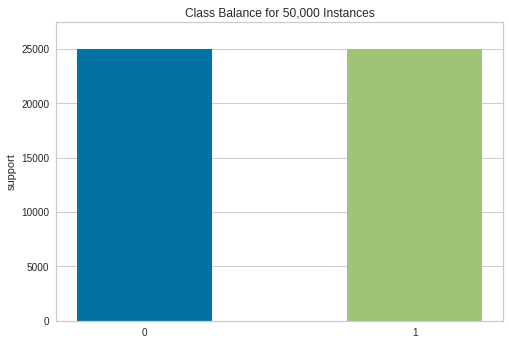

,sentiment,ttlCol
0,0,25000
1,1,25000


Cleaning text column...


100%|███████████████████████████████████| 50000/50000 [00:20<00:00, 2385.63it/s]
[nltk_data] Downloading package stopwords to /home/magni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing stopwords...


100%|███████████████████████████████████| 50000/50000 [00:09<00:00, 5350.05it/s]



Encoding to TF-IDF with max_features=100
Encoding completed. Feature list:
['acting', 'actors', 'actually', 'all', 'also', 'and', 'another', 'around', 'back', 'bad', 'best', 'better', 'big', 'br', 'can', 'cast', 'character', 'characters', 'could', 'director', 'end', 'even', 'ever', 'every', 'film', 'films', 'find', 'first', 'funny', 'get', 'go', 'going', 'good', 'got', 'great', 'he', 'horror', 'however', 'in', 'it', 'know', 'life', 'like', 'little', 'look', 'lot', 'love', 'made', 'make', 'makes', 'man', 'many', 'movie', 'movies', 'much', 'never', 'new', 'nothing', 'old', 'one', 'part', 'people', 'plot', 'pretty', 'quite', 'real', 'really', 'say', 'scene', 'scenes', 'see', 'seems', 'seen', 'show', 'something', 'still', 'story', 'take', 'that', 'the', 'there', 'thing', 'things', 'think', 'this', 'though', 'time', 'two', 'us', 've', 'want', 'watch', 'watching', 'way', 'well', 'work', 'world', 'would', 'years', 'young']

Completed train/test split (train_size = 0.8):
---> Original data si

<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

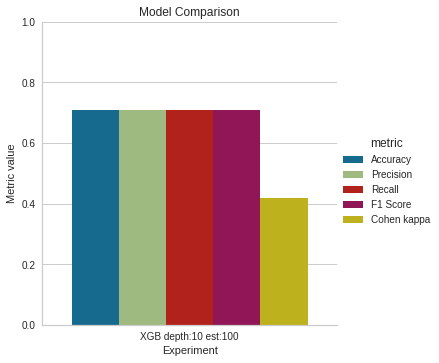

             Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:10 est:100      0.71       0.71    0.71      0.71         0.42

[learning_curve] Training set sizes: [ 3200  6400 16000 32000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:   31.4s remaining:  3.0min
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:   49.0s remaining:   59.9s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  1.0min remaining:   20.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished




-------------------------------------------------------
Processing experiment: [1] XGB depth:10 est:50
Training model for XGB depth:10 est:50
Predicting model for XGB depth:10 est:50
Model Stats:


<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

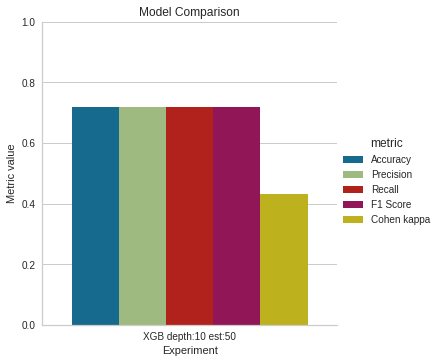

            Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:10 est:50      0.72       0.72    0.72      0.72         0.43

[learning_curve] Training set sizes: [ 3200  6400 16000 32000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:   18.3s remaining:  1.7min
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:   32.3s remaining:   39.4s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:   35.9s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.7s finished




-------------------------------------------------------
Processing experiment: [2] XGB depth:3 est:100
Training model for XGB depth:3 est:100
Predicting model for XGB depth:3 est:100
Model Stats:


<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

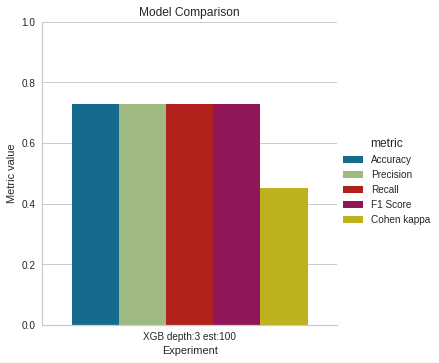

            Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:3 est:100      0.73       0.73    0.73      0.73         0.45

[learning_curve] Training set sizes: [ 3200  6400 16000 32000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    3.1s remaining:   17.3s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    4.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    4.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.4s finished




-------------------------------------------------------
Processing experiment: [3] XGB depth:3 est:50
Training model for XGB depth:3 est:50
Predicting model for XGB depth:3 est:50
Model Stats:


<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

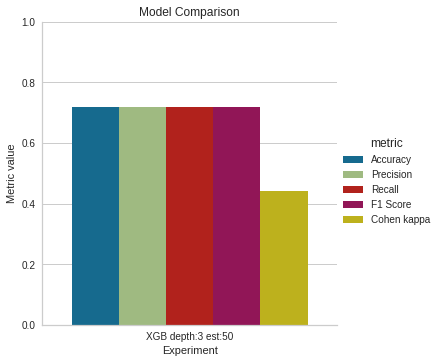

           Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:3 est:50      0.72       0.72    0.72      0.72         0.44

[learning_curve] Training set sizes: [ 3200  6400 16000 32000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    1.3s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    2.2s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    2.6s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.7s finished




-------------------------------------------------------
Processing experiment: [4] XGB depth:3 est:20
Training model for XGB depth:3 est:20
Predicting model for XGB depth:3 est:20
Model Stats:


<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

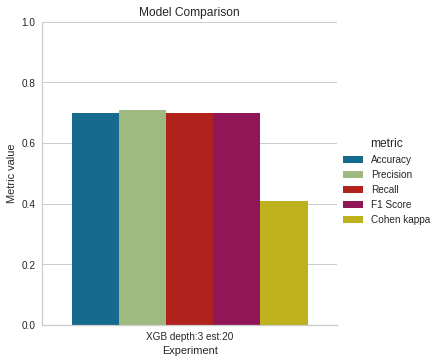

           Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:3 est:20       0.7       0.71     0.7       0.7         0.41

[learning_curve] Training set sizes: [ 3200  6400 16000 32000]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  20 | elapsed:    0.7s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:    1.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    1.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.8s finished




Processing experiments complete.


<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

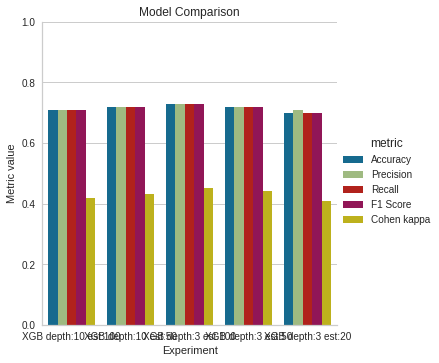

             Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:10 est:100      0.71       0.71    0.71      0.71         0.42
1   XGB depth:10 est:50      0.72       0.72    0.72      0.72         0.43
2   XGB depth:3 est:100      0.73       0.73    0.73      0.73         0.45
3    XGB depth:3 est:50      0.72       0.72    0.72      0.72         0.44
4    XGB depth:3 est:20      0.70       0.71    0.70      0.70         0.41


<Figure size 576x396 with 0 Axes>

In [15]:
axis_labels = [0,1] #This won't be needed once the label encoder has been included
myEM.run_experiment(axis_labels=axis_labels,
                    n_jobs=-1,  # -1 means use all available processors, otherwise include number
                    index=None) # index=None means process all experiements, 
                                # otherwise provide index of single experiment to run

# Experiment Summary

Displaying summary for experiment: XGB depth:10 est:100
Model Stats:


<Figure size 576x396 with 0 Axes>

<Figure size 720x720 with 0 Axes>

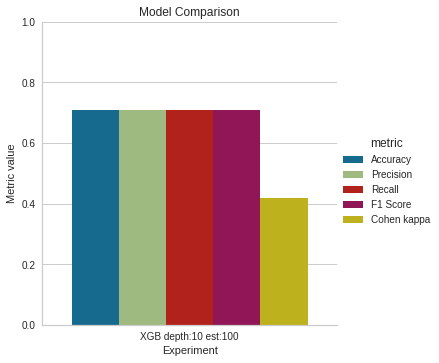

             Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:10 est:100      0.71       0.71    0.71      0.71         0.42

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      5000
           1       0.71      0.72      0.72      5000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



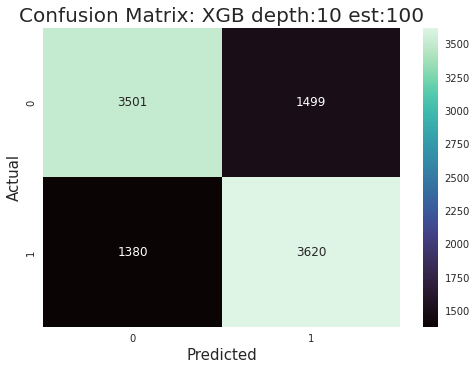

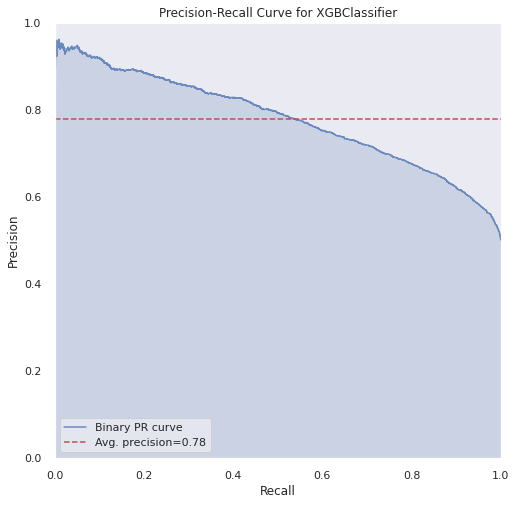

<Figure size 576x576 with 0 Axes>

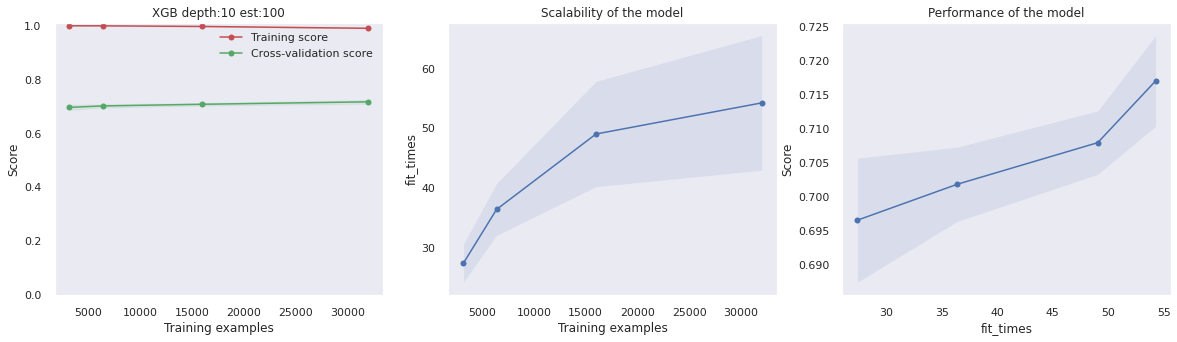

Model ROCAUC not calculated. Starting now


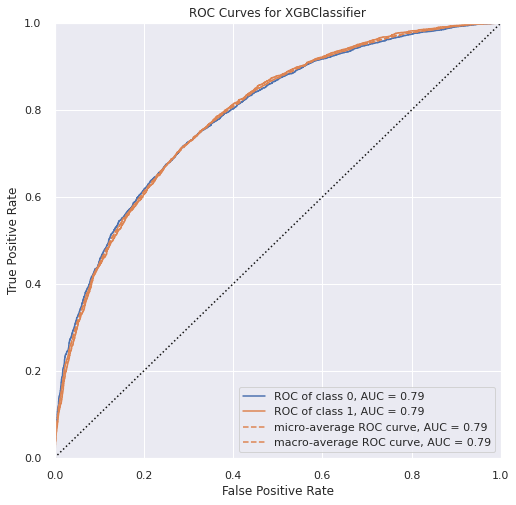

  0%|          | 0/101 [00:00<?, ?it/s]

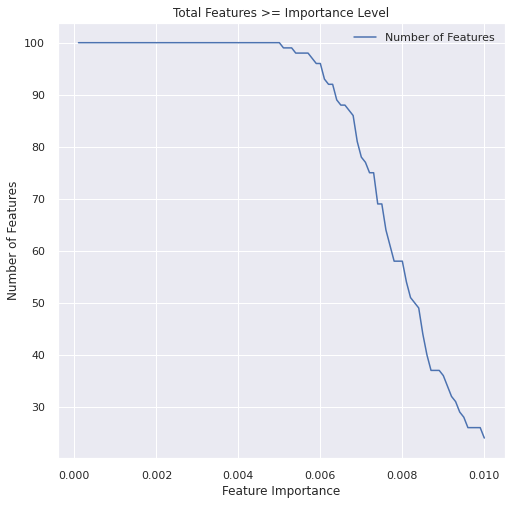

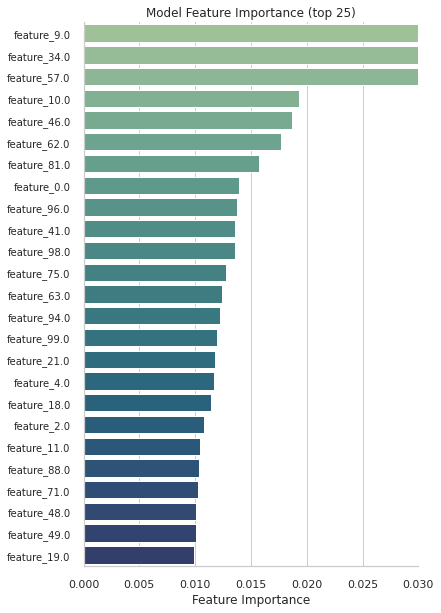

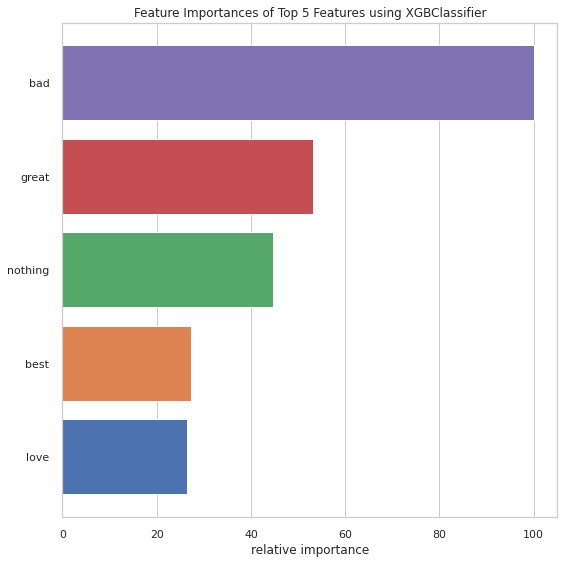

<Figure size 576x576 with 0 Axes>

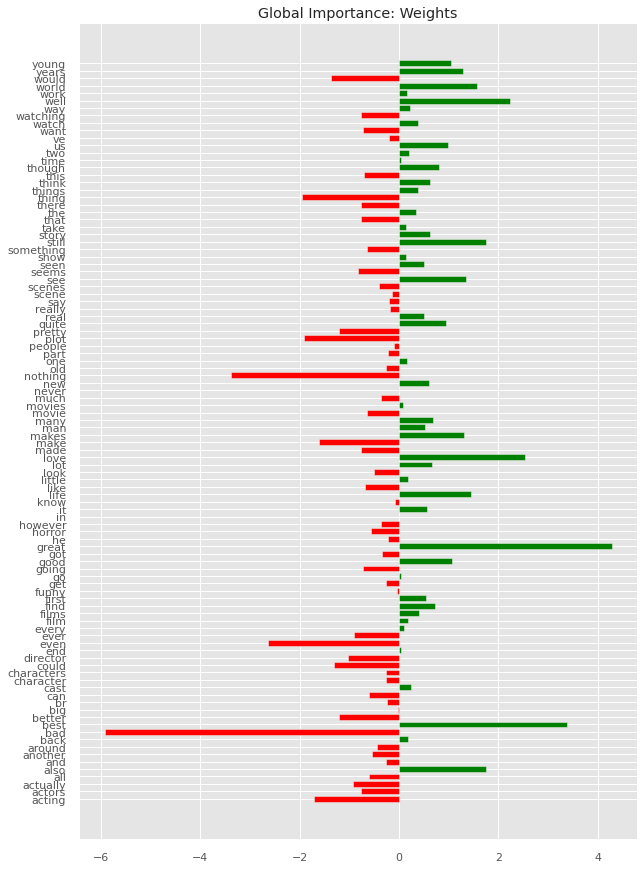

predicted [1]
actual 0


X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


<Figure size 576x576 with 0 Axes>

In [16]:
myEM.display_experiment_summary(index=0, axisLabels=axis_labels)

In [17]:
#myEM.display_experiment_summary(index=1, axisLabels=axis_labels)

# SHAP

SHAP values not calculated. Generating now
Calculating shap_values for XGB depth:10 est:100


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


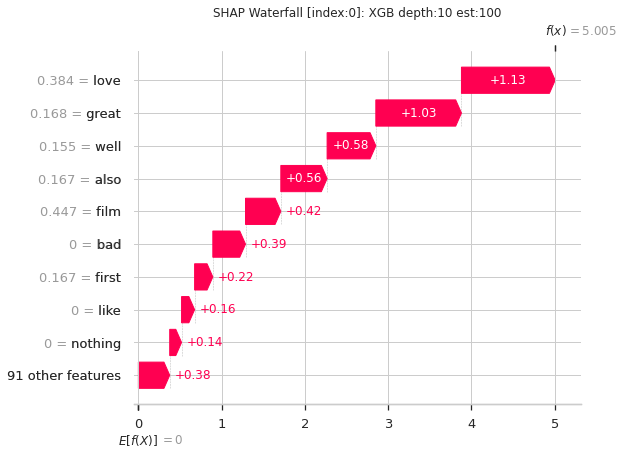

<Figure size 576x576 with 0 Axes>

In [18]:
myEM.show_shap_waterfall(model_index=0,
                         value_index=0)

SHAP values not calculated. Generating now
Calculating shap_values for XGB depth:10 est:50


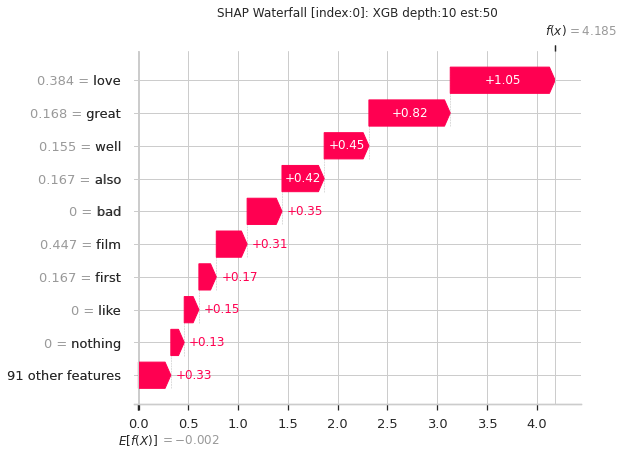

<Figure size 576x576 with 0 Axes>

In [19]:
myEM.show_shap_waterfall(model_index=1,
                         value_index=0)

SHAP values not calculated. Generating now
Calculating shap_values for XGB depth:3 est:100


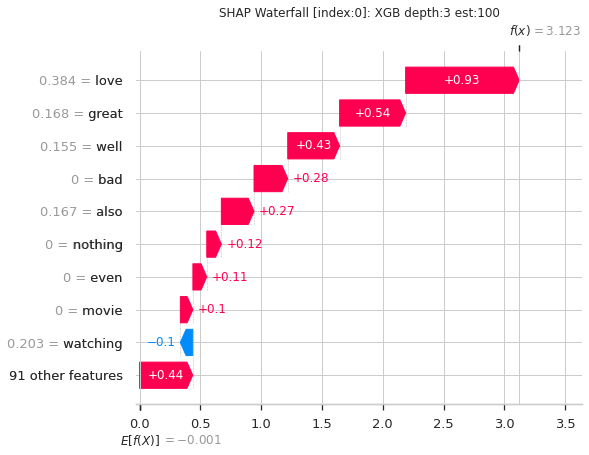

<Figure size 576x576 with 0 Axes>

In [20]:
myEM.show_shap_waterfall(model_index=2,
                         value_index=0)

SHAP values not calculated. Generating now
Calculating shap_values for XGB depth:3 est:50


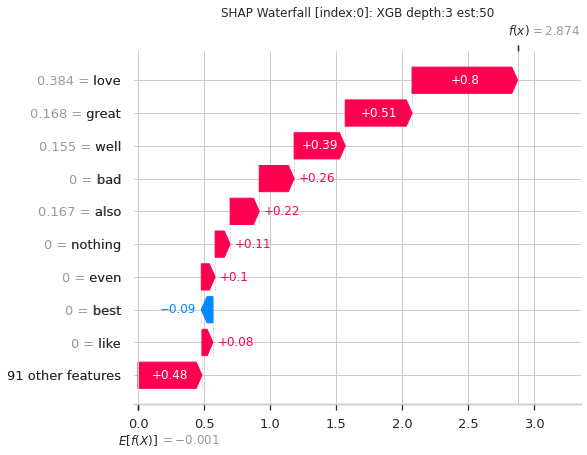

<Figure size 576x576 with 0 Axes>

In [21]:
myEM.show_shap_waterfall(model_index=3,
                         value_index=0)

SHAP values not calculated. Generating now
Calculating shap_values for XGB depth:3 est:20


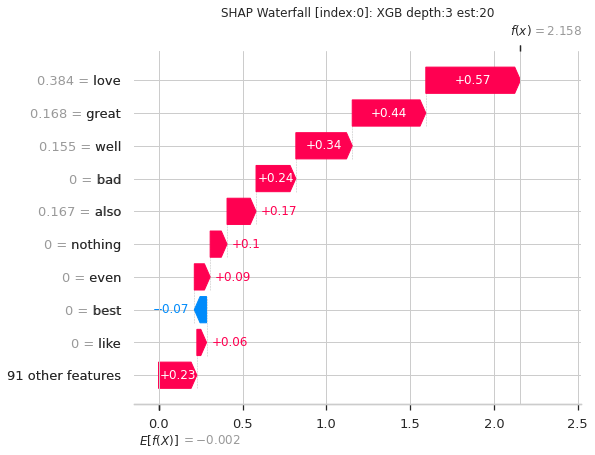

<Figure size 576x576 with 0 Axes>

In [22]:
myEM.show_shap_waterfall(model_index=4,
                         value_index=0)

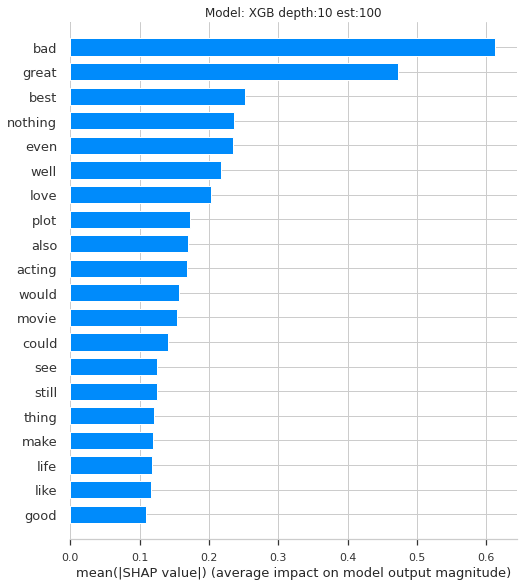

<Figure size 576x576 with 0 Axes>

In [23]:
myEM.show_shap_summary(model_index=0)

# Persistence - Experiment Manager

In [24]:
filename_EM = f'{PROJECT_DIR}/testExperimentManager.pk.gz'
myEM.save(filename_EM)

Saving file as /home/magni/ML_Root/project_root/NLP-Pipeline/testExperimentManager


In [25]:
recoveredEM = ExperimentManager.load(filename_EM)

In [26]:
recoveredEM.display()

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: review
---> targetColumn: sentiment
Original Data:
---> original data shape: (50000, 3)
Working Data:
---> working data shape: (50000, 102)
Process:
---> isProcessed: True
---> isCleaned: True
---> isStopWorded: True
---> isBalanced: True
---> isEncoded: True
---> isTrainTestSplit: True
Data:
---> isOrigDataLoaded: True
---> isTrainDataLoaded: True
---> isTestDataLoaded: True

DataExperiment summary:
---> projectName: NLPipe
---> experimentName: XGB depth:10 est:100
---> isDataPackageLoaded: True
---> isProcessed: True
---> isModelLoaded: True
---> isModelPredicted: True
---> isModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=0, importance_type=None, interaction_constraints=None

# Scratchpad